In [1]:
import defdap
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
%matplotlib inline
from defdap import quat
from defdap import ebsd
from defdap import hrdic
from defdap.plotting import MapPlot

In [2]:
output ="../results/A3_zone1/"

In [3]:
DicFilePath = "../DIC_data/A3/zone_1/" #A3_zone1
#DicFilePath = "../DIC_data/A3/zone_2/" #A3_zone2
#DicFilePath = "../DIC_data/A3/zone_3/" #A3_zone2
#DicFilePath = "../DIC_data/B2/" #B2_zone1

#A3 1,20
#B2 1,17
e11list = []
for n in range(1,17):
    if n <10:
        DicMap = hrdic.Map(DicFilePath, "B0000{}.txt".format(n))
    else:
        DicMap = hrdic.Map(DicFilePath, "B000{}.txt".format(n))
    DicMap.setCrop(xMin=20, xMax=20, yMin=20, yMax=20)
    DicMap.setScale(micrometrePerPixel=40/2048)

    e11list.append(np.mean(DicMap.crop(DicMap.e11)))

In [4]:
#np.save("e11_B2_zone1.npy",e11list)

In [5]:
e11_a3_zone1 = np.load('e11_A3_zone1.npy')
e11_a3_zone2 = np.load('e11_A3_zone2.npy')
e11_a3_zone3 = np.load('e11_A3_zone3.npy')
e11_b2_zone1 = np.load('e11_B2_zone1.npy')
steps = np.arange(19)

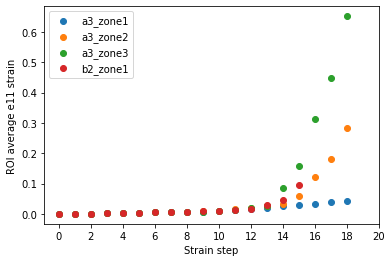

In [6]:
plt.figure()
plt.scatter(steps,e11_a3_zone1,label='a3_zone1')
plt.scatter(steps,e11_a3_zone2,label='a3_zone2')
plt.scatter(steps,e11_a3_zone3,label='a3_zone3')
plt.scatter(steps[:16],e11_b2_zone1,label='b2_zone1')
plt.xlabel('Strain step')
plt.xticks(np.arange(0, 21, 2))

plt.ylabel('ROI average e11 strain')
plt.legend()

In [7]:
stress_strain_path = ("../mechanical_testing_data/")

In [8]:
exp_stress_strain_b2 = pd.read_csv(stress_strain_path + "A3.csv") #this is not a mistake
exp_stress_strain_a3 = pd.read_csv(stress_strain_path + "Sample B2.csv") # this is not a mistake

In [9]:
extension_b2 = exp_stress_strain_b2['Elongation (µm)'].values
force_b2 = exp_stress_strain_b2['Force (N)'].values
extension_a3 = exp_stress_strain_a3['Elongation (µm)'].values
force_a3 = exp_stress_strain_a3['Force (N)'].values

In [10]:
width  = 3    /1000 #mm -> m
depth  = 1.75 /1000 #mm -> m
length = 10   *1000 #mm -> um

area = width * depth
exp_eng_stress_b2 = force_b2 / (area * 1000000)
exp_eng_stress_a3 = force_a3 / (area * 1000000)
#exp_eng_strain = extension /length

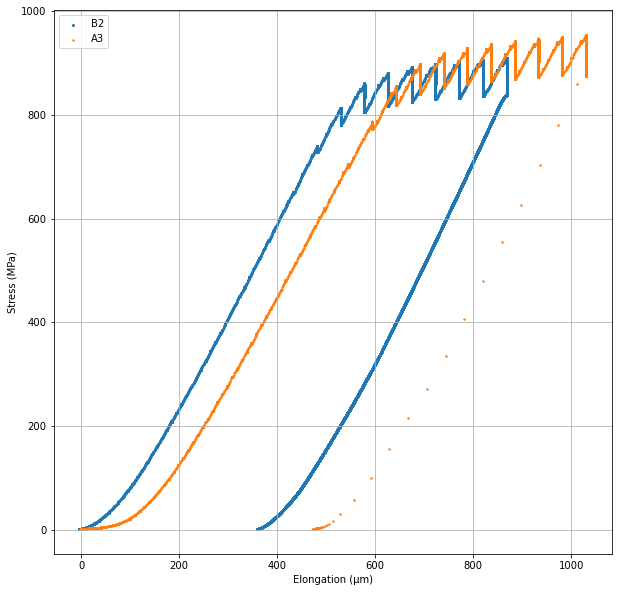

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(extension_b2,exp_eng_stress_b2,s=4,label='B2')
plt.scatter((extension_a3),exp_eng_stress_a3,s=2,label='A3')

plt.ylabel("Stress (MPa)")
plt.xlabel("Elongation (µm)")
plt.grid()
#plt.xlim(400,800)
#plt.ylim(800,900)
plt.legend()
#plt.savefig(output_path + 'extension_force.png')

In [12]:
extension_at_image_b2 = [0,36,85,135,284, 333,382,431,480,529, 577,625, 674, 723,771,819,868] # a3 named from tanist
force_at_image_b2 = [11,91,333,684,1985, 2461,2938,3417,3882,4271, 4518,4625, 4683, 4717,4742,4760,4773] # a3 named from tanist

extension_at_image_a3 = [0,50,99,149,298, 347,397,446,496,544, 594,642,691,740, 788, 836,884,933,981,1029] #b2 named from tanist
force_at_image_a3 = [10,30,113,332,1451, 1896,2342,2791,3250,3707, 4131,4495,4714,4823, 4860, 4915,4946,4974,4988,5009] # b2 named from tanist

In [13]:
exp_eng_stress_at_image_b2 = np.array(force_at_image_b2) / (area * 1000000)
exp_eng_stress_at_image_a3 = np.array(force_at_image_a3) / (area * 1000000)

In [15]:

print(exp_eng_stress_at_image_a3[8
                                ])

619.0476190476189


In [14]:
3500 / (area * 1000000)
exp_eng_stress_at_image_a3[8]

619.0476190476189

Text(0.5, 0, 'Elongation (µm)')

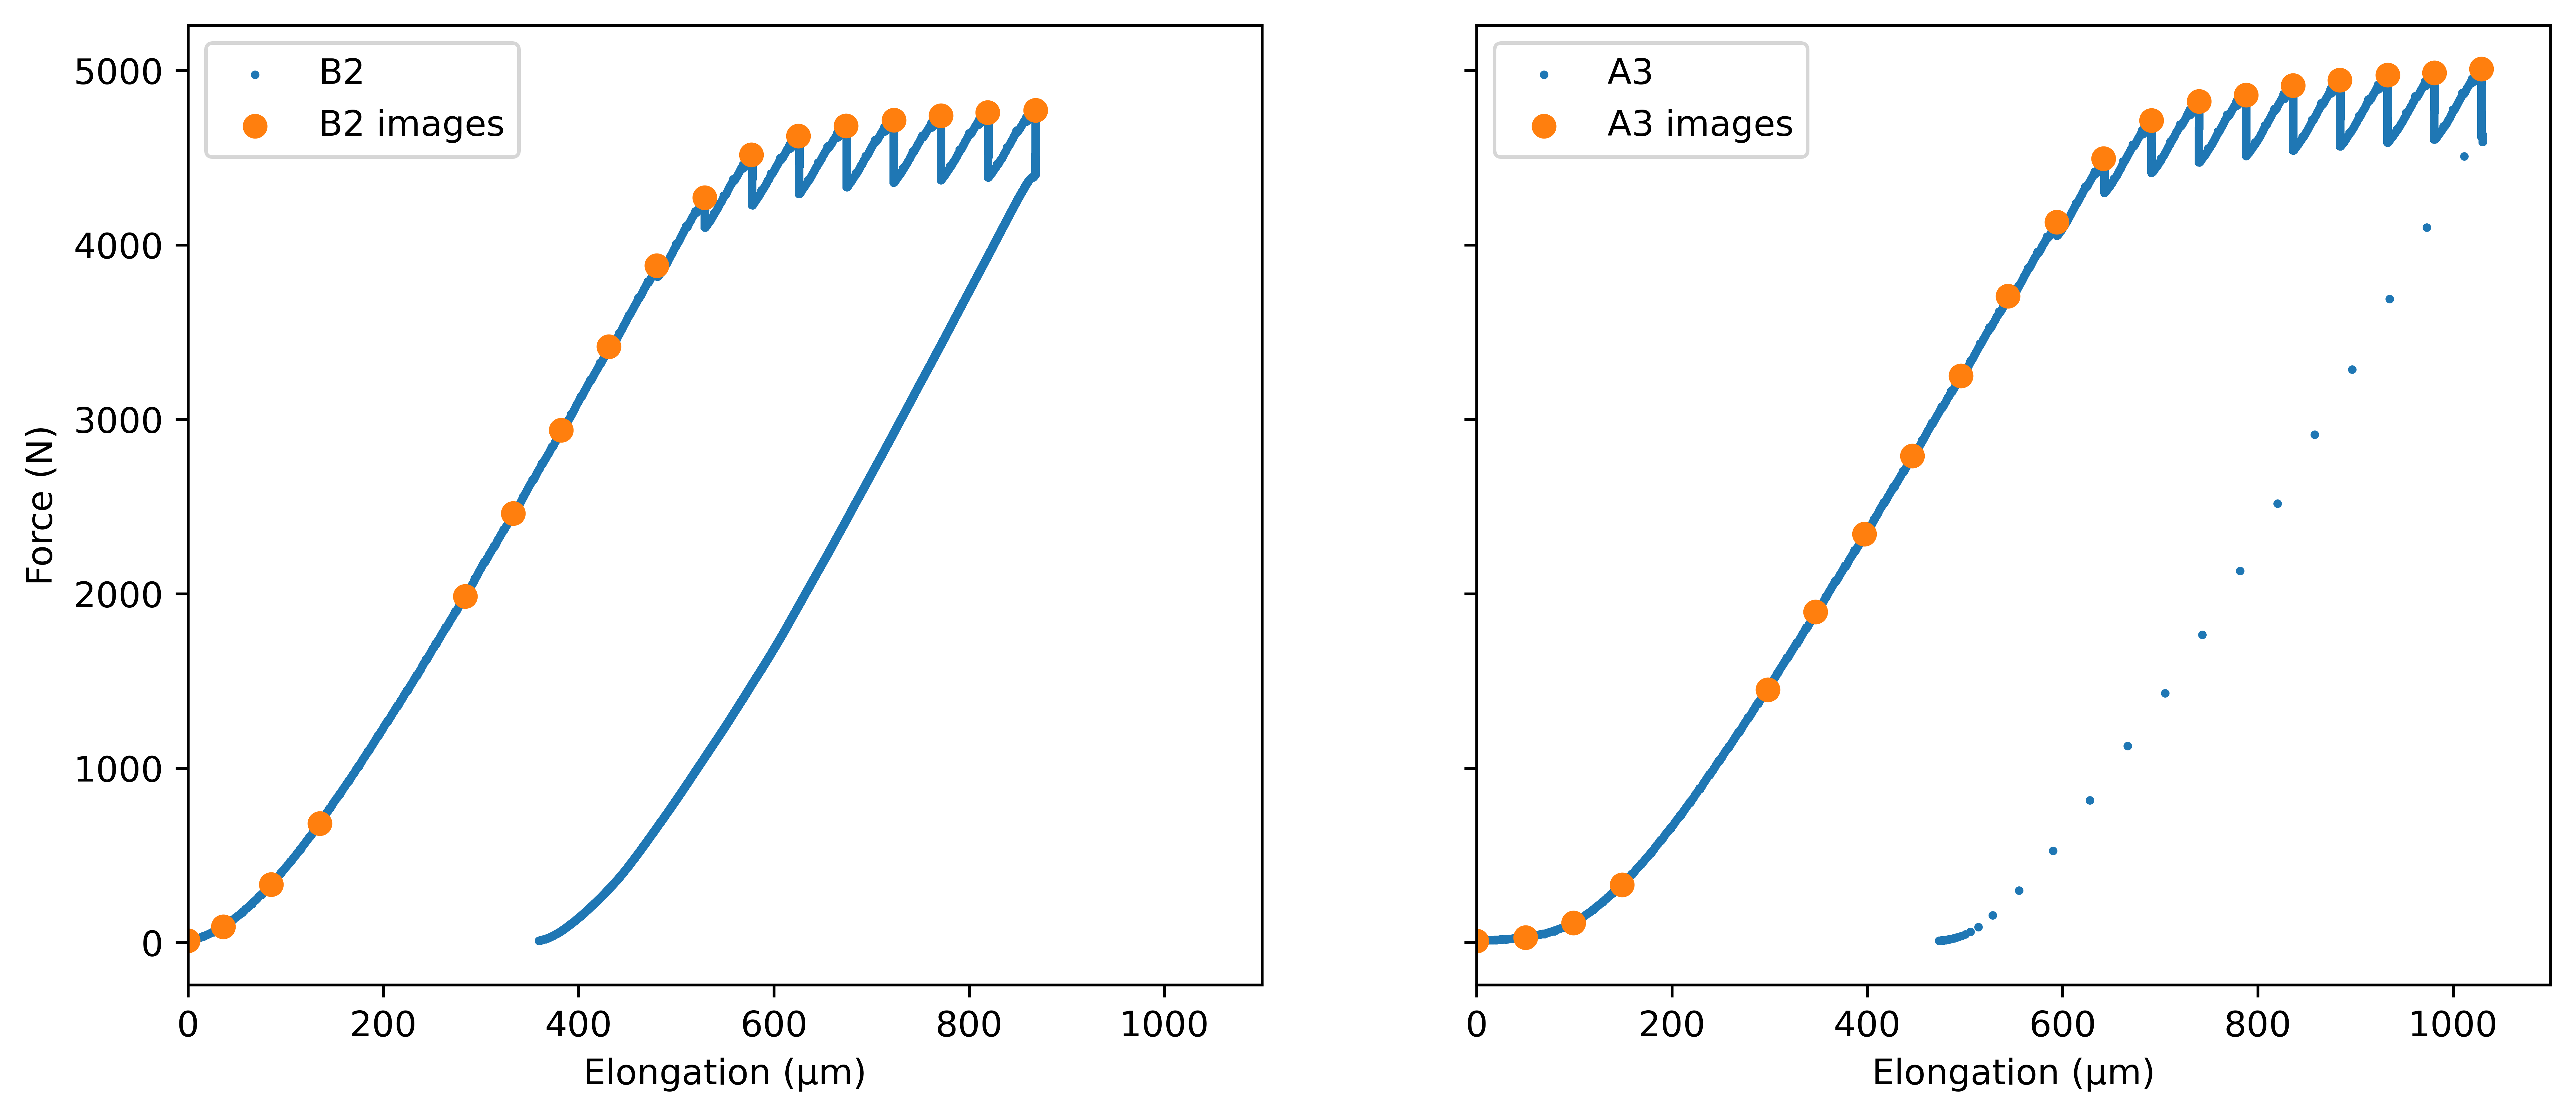

In [16]:
#plt.figure(figsize=(12,5))
#plt.subplot(1, 2, 1)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True,dpi=800)

axes[0].scatter(extension_b2,force_b2,s=2,label='B2')
axes[0].scatter(extension_at_image_b2,force_at_image_b2,label = 'B2 images')
axes[0].set_xlim(0,1100)
axes[0].legend()
axes[0].set_ylabel("Force (N)")
axes[0].set_xlabel("Elongation (µm)")


axes[1].scatter((extension_a3),force_a3,s=2,label='A3')
axes[1].scatter(extension_at_image_a3,force_at_image_a3,label = 'A3 images')
axes[1].legend()
axes[1].set_xlim(0,1100)
axes[1].set_xlabel("Elongation (µm)")

In [21]:
#0.2% proof stress
j=5
m = exp_eng_stress_at_image_a3[j]/e11_a3_zone1[j]

c = m*(-0.002)
proof_s=[]
x=[]
    
i=0
while i < 0.1:
    proof_s.append(m*i+c)
    x.append(i)
    i += 0.0001
#print(x)

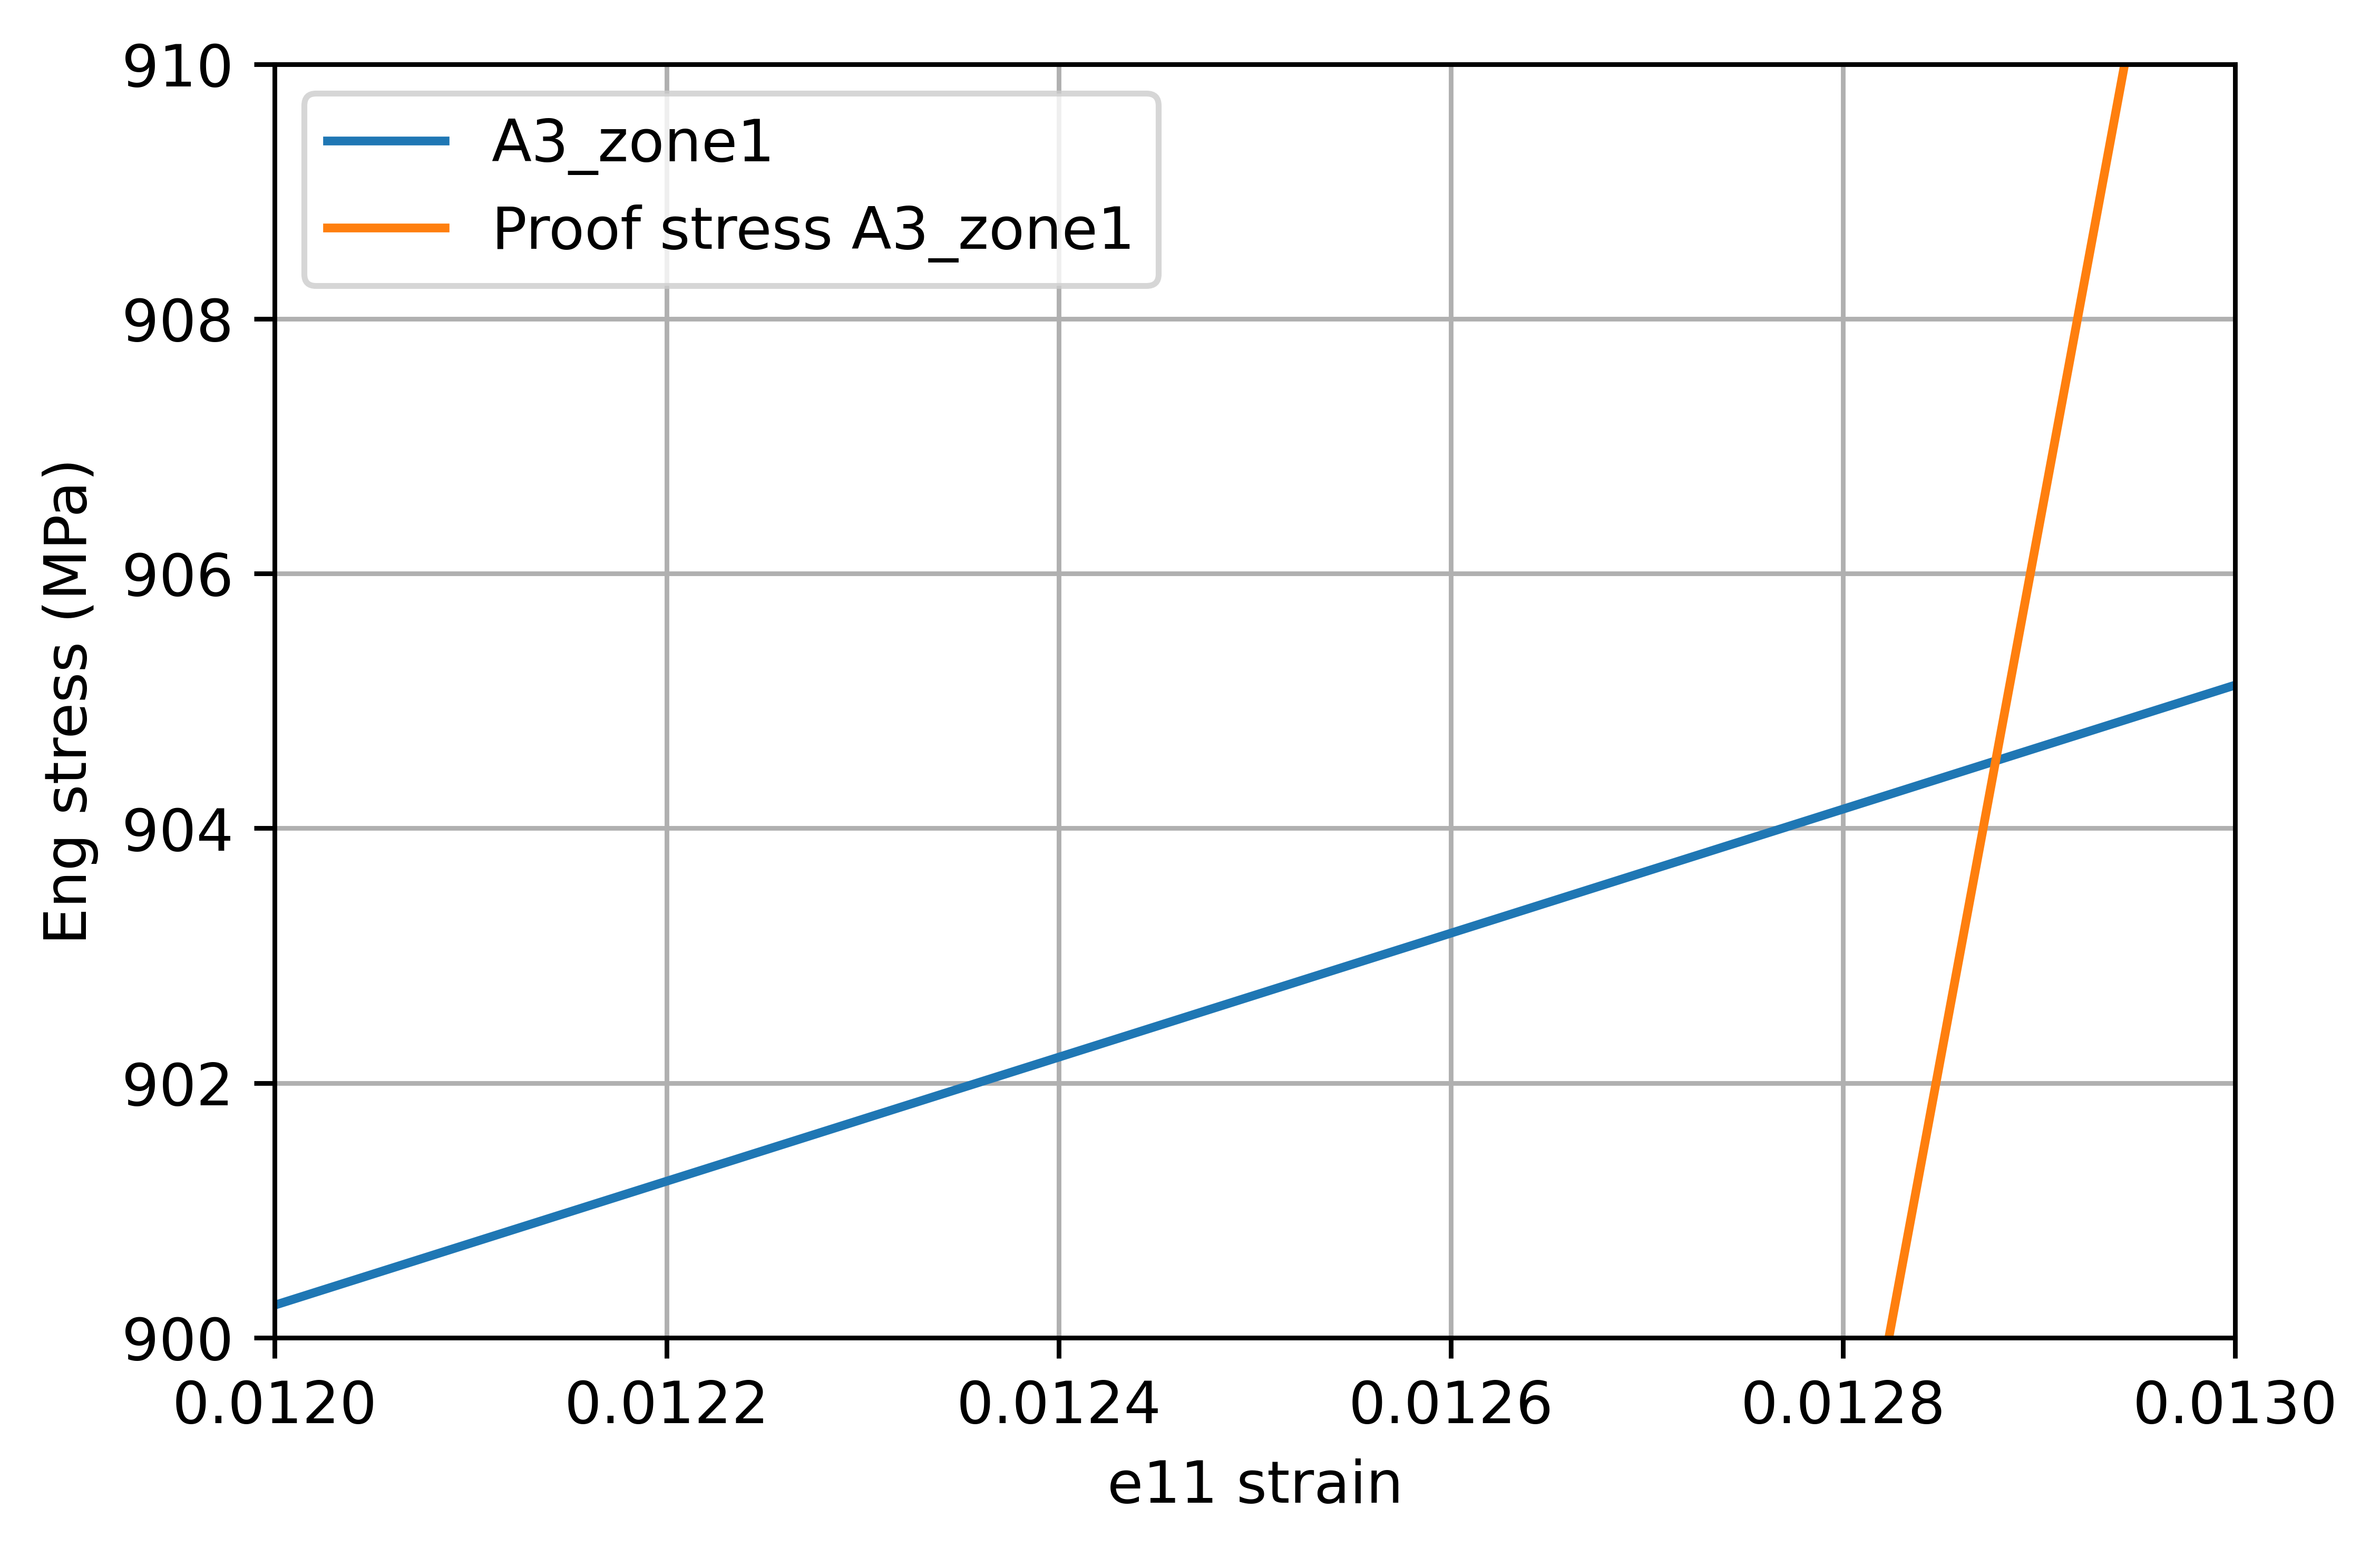

In [29]:
plt.figure(dpi=800)
#plt.plot(e11_b2_zone1,exp_eng_stress_at_image_b2[1:],label='B2_zone1')
plt.plot(e11_a3_zone1,exp_eng_stress_at_image_a3[1:],label='A3_zone1')
#plt.plot(e11_a3_zone2,exp_eng_stress_at_image_a3[1:],label='A3_zone2')
#plt.plot(e11_a3_zone3,exp_eng_stress_at_image_a3[1:],label='A3_zone3')
plt.plot(x,proof_s,label='Proof stress A3_zone1')
plt.xlabel('e11 strain')
plt.ylabel('Eng stress (MPa)')
plt.xlim(0.012,0.013)
plt.ylim(900,910)
plt.grid()
plt.legend()
#plt.savefig(output + 'stress-strain')
# yield for A3_zone1 = 905MPa 